In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.optimize import curve_fit
from scipy.constants import e, m_e

In [5]:
sns.set_theme()
plt.rcParams['figure.dpi'] = 120

# Atividade 4 - Calibração do Filtro de Velocidades

In [6]:
ac_volts = np.array([ 127.8, 78.4, 40.7, 22.4 ]) * 10
sVac = 5
R, sR = 63.1, 0.5

In [7]:
volts = np.loadtxt('data.txt').transpose()

In [8]:
Vmag    = volts[[0, 2, 4, 6]]
Vp    = volts[[1, 3, 5, 7]]
Imag  = Vmag / R

In [9]:
Vp

array([[ 7.28, 15.1 , 22.4 , 30.  ],
       [ 4.5 ,  9.  , 13.6 , 18.2 ],
       [ 2.3 ,  4.6 ,  7.  ,  9.3 ],
       [ 1.1 ,  2.7 ,  4.  ,  5.5 ]])

In [10]:
fits = []
for i in range(4):
  popt, pcov = curve_fit(
      lambda x, a, b: a * x + b,
      xdata=Imag[i],
      ydata=Vp[i],
      sigma=[0.5]*4
  )
  print(popt)
  fits.append((popt, pcov))

[ 4.82894550e+02 -3.22321028e-01]
[ 3.75959281e+02 -3.08288358e-01]
[ 2.68890084e+02 -2.19132242e-01]
[211.78693858  -0.3166613 ]


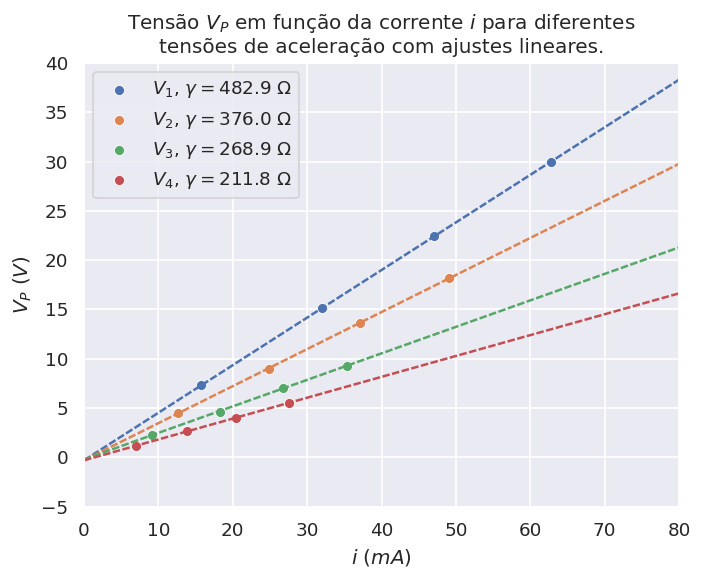

In [11]:
plt.title('Tensão $V_P$ em função da corrente $i$ para diferentes\ntensões de aceleração com ajustes lineares.')

x = np.linspace(0, 0.5, 10)

for i in range(4):
  sns.lineplot(x=x*1E3, y=fits[i][0][0]*x + fits[i][0][1], dashes=(3,1))
  sns.scatterplot(x=Imag[i]*1E3, y=Vp[i], marker='o', edgecolor='white', label=f'$V_{i+1}$, $\\gamma={fits[i][0][0]:.1f}$ $\\Omega$')

plt.xlabel('$i$ ($mA$)')
plt.ylabel('$V_P$ ($V$)')
plt.xlim(0, 80)
plt.ylim(-5, 40)

plt.savefig('plots/vp_curr.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
gamma, sGamma = [], []
for i in range(4):
  gamma.append(fits[i][0][0])
  sGamma.append(np.sqrt(fits[i][1][0,0]))
gamma = np.array(gamma)
sGamma = np.array(sGamma)

In [13]:
for i in range(4):
  print(f'GAMMA{i+1}:\t{gamma[i]:.1f}\t{sGamma[i]:.3f}')

GAMMA1:	482.9	0.978
GAMMA2:	376.0	2.089
GAMMA3:	268.9	3.535
GAMMA4:	211.8	5.400


$$ v_{0x} = \sqrt{2e\frac{V_{AC}}{m}} $$

In [14]:
v0x   = np.sqrt( 2 * e * ac_volts / m_e )
sv0x  = np.sqrt( e / (2 * ac_volts * m_e ) ) * sVac

In [15]:
for i in range(4): print(f'V0X{i+1}\t{v0x[i]:.2e}\t{sv0x[i]:.2e}')

V0X1	2.12e+07	4.15e+04
V0X2	1.66e+07	5.30e+04
V0X3	1.20e+07	7.35e+04
V0X4	8.88e+06	9.91e+04


In [16]:
popt, pcov = curve_fit(
    lambda x, a, b: x * a + b,
    xdata=gamma,
    ydata=v0x,
    sigma=sv0x
)

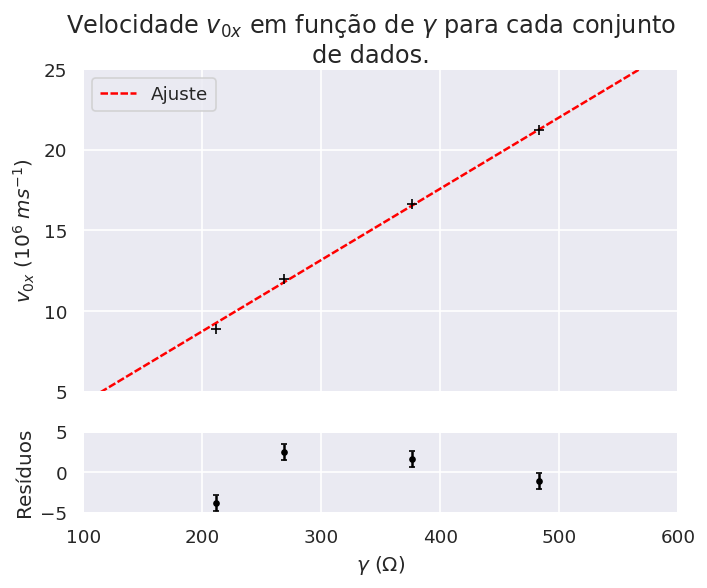

In [17]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={ 'height_ratios': (4,1) })
plt.suptitle('Velocidade $v_{0x}$ em função de $\\gamma$ para cada conjunto\nde dados.')

x = np.linspace(100, 600, 10)

sns.lineplot(x=x, y=(popt[0] * x + popt[1]) / 1E6, color='red', label='Ajuste', dashes=(3,1), ax=axs[0])
axs[0].errorbar(
    x=gamma, y=v0x / 1E6,
    fmt=' ', color='black', marker='+', capsize=2, label='Dados'
)

axs[1].errorbar(
    x=gamma,
    y=(v0x - (popt[0] * gamma + popt[1]) ) / sv0x,
    yerr=1,
    fmt=' ', color='black', marker='.', capsize=2
)

axs[0].set(ylabel='$v_{0x}$ ($10^{6} \\hspace{0.3} ms^{-1}$)', ylim=(5, 25), yticks=(5, 10, 15, 20, 25))
axs[1].set(xlabel='$\\gamma$ ($\\Omega$)', ylabel='Resíduos', xlim=(100, 600), ylim=(-5, 5))

plt.savefig('plots/velocity_gamma.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
np.sum((v0x - (popt[0] * gamma + popt[1]) )**2 / sv0x**2)

24.893706122043017

In [19]:
delta, sDelta = popt[0], np.sqrt(pcov[0,0])

In [20]:
print(f'DELTA:\t{delta:.2e}\t{sDelta:.2e}')

DELTA:	4.42e+04	1.06e+03


In [21]:
A, C = 12.79, 11.7E3

In [22]:
np.sqrt(2 * e / m_e) * A / C

648.3512905058366